In [2]:
import pandas as pd
import sklearn as sk

Substitua `dataset_link` pelo dataset de sua escolha

In [25]:
# Usa o dataset 'ionosphere'
dataset_link = 'http://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data'

# Carrega o dataset para um DataFrame do Pandas
df = pd.read_csv(dataset_link, header = None)

# Renomeia a coluna que será usada para a classificação
df.rename(columns={34: 'CLASS'}, inplace=True)

# Impime as primeiras linhas para verificação
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,CLASS
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


Remova as colunas que não deseja passando o indice delas para `drop` (use a váriavel boleana e a array para remover as colunas)

In [26]:
# Marca se os dados devem ser normalizados ou não
drop_col = False
cols_to_drop = [0]

# Remove colunas do DataFrame pois elas não são úteis ao modelo
if drop_col:
  df = df.drop(cols_to_drop, axis=1)

# Impime as primeiras linhas para verificação
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,CLASS
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


Separa a coluna que vai servir para a classificação, passe o índice dela considerando as colunas que já fora dropadas

In [27]:
# Separa a "classe" do resto do DataFrame
y = df[['CLASS']]

# Impime as primeiras linhas para verificação
y.head()

,CLASS
0,g
1,b
2,g
3,b
4,g


Remove a coluna que foi separada para ser a "classe"

In [28]:
# Remove a coluna "class" que foi separada, mantendo somente as features
X = df.drop(['CLASS'], axis = 1)

# Impime as primeiras linhas para verificação
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697


Faz o pré-processamento dos dados necessários como por exemplo a normalização (marque as variáveis como true para fazer o pré-processamento)

In [29]:
from sklearn import preprocessing

# Marca se os dados devem ser normalizados ou não
normalize = True

# Faz a normalização dos dados se necessário
if normalize:
  min_max_scaler = preprocessing.MinMaxScaler()
  X_normalized = min_max_scaler.fit_transform(X)
  X = pd.DataFrame(X_normalized)

# Impime as primeiras linhas para verificação
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,1.0,0.0,0.997695,0.470555,0.926215,0.511530,0.91699,0.311460,1.000000,0.518800,0.926215,0.411225,0.798775,0.275275,0.802680,0.308885,0.921780,0.307290,0.791060,0.339040,0.784855,0.351630,0.684730,0.263215,0.784055,0.244145,0.705390,0.269160,0.606330,0.329550,0.711335,0.227565,0.593205,0.273500
1,1.0,0.0,1.000000,0.405855,0.965175,0.319220,0.44566,0.032015,1.000000,0.477255,0.754370,0.161285,0.672160,0.151465,0.241575,0.012425,0.527495,0.188815,0.665545,0.000000,0.434245,0.273500,0.409720,0.321330,0.398340,0.367155,0.397660,0.407995,0.404800,0.442035,0.416870,0.468560,0.431310,0.487765
2,1.0,0.0,1.000000,0.483175,1.000000,0.502425,1.00000,0.439690,0.944825,0.505990,0.865410,0.526730,0.927215,0.504135,0.772955,0.501495,0.918875,0.431780,0.877675,0.457300,0.854435,0.362490,0.716925,0.439690,0.787640,0.298900,0.794920,0.389275,0.715500,0.413175,0.802180,0.379100,0.780225,0.308810
3,1.0,0.0,1.000000,0.274195,1.000000,1.000000,0.85608,0.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,0.572580,0.770470,0.303350,0.000000,0.227665,0.150125,1.000000,0.500000,0.500000,1.000000,0.953475,0.758065,1.000000,1.000000,0.399505,0.628410,1.000000,0.338090,1.000000
4,1.0,0.0,1.000000,0.487995,0.970700,0.532655,0.96053,0.383725,0.885760,0.418005,0.763990,0.398625,0.782045,0.496440,0.671975,0.362715,0.764700,0.391100,0.725535,0.410935,0.529910,0.322125,0.511545,0.235605,0.516430,0.174210,0.566450,0.233970,0.512155,0.189015,0.471465,0.202135,0.476960,0.171515


Cria a árvore de decisão e faz o 10-fold cross-validation

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

# Cria a árvore de decisão
dt = DecisionTreeClassifier(min_impurity_decrease=0.05)

# Faz a 10-fold cross-validation
scores = cross_validate(dt, X, y, cv=10, return_estimator=True)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2)) # 95% confidence

Accuracy: 0.89 (+/- 0.10)


Mostra a melhor arvore de decisão na tela, lembre de substituir o nome das classes

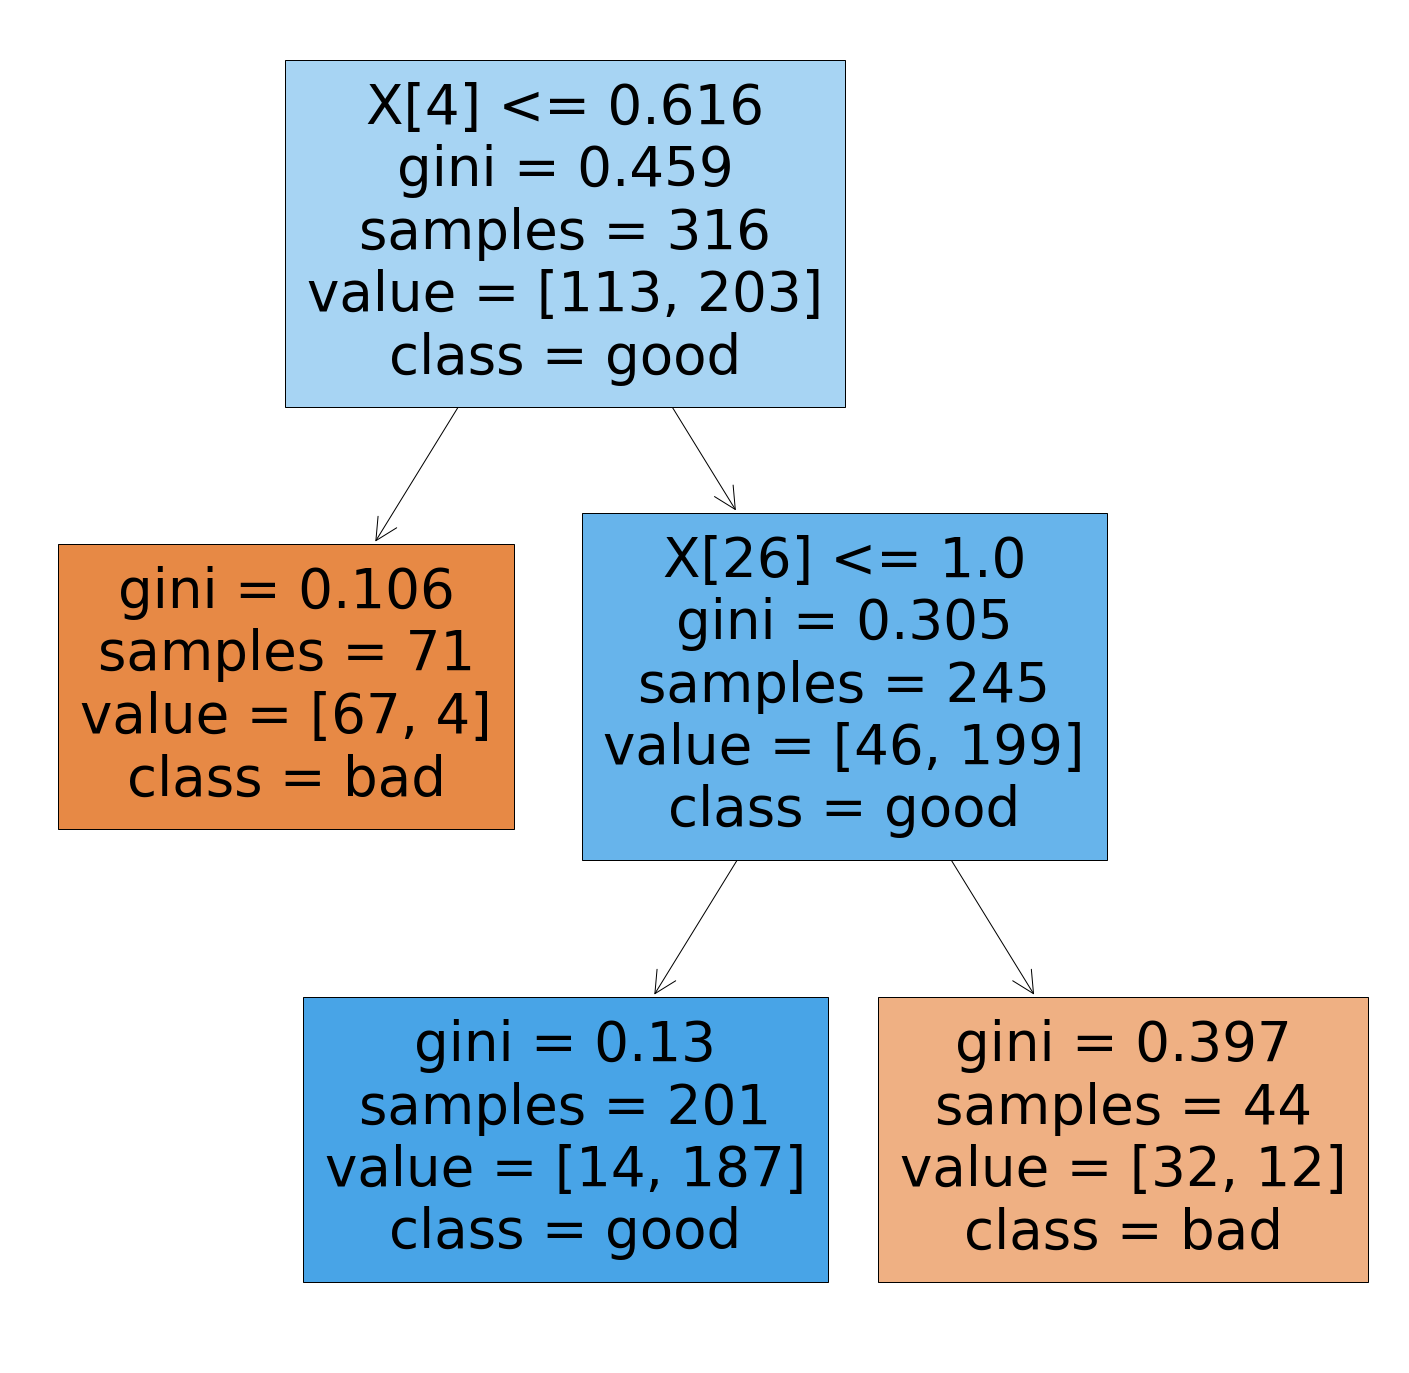

In [37]:
import matplotlib.pyplot as plt
from sklearn import tree

# Mostra a melhor árvore de decisão
max_score = scores['test_score'].max()
for i in range(len(scores['test_score'])):
  if scores['test_score'][i] == max_score:
    best_dt = scores['estimator'][i]

# Exibe a árvore
cn=['bad', 'good']
fig, ax = plt.subplots(figsize=(25, 25)) 
tree.plot_tree(best_dt, class_names=cn, filled = True);
plt.show()